In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

### Check if the timestamps are the same for each CSV file of every channel

In [32]:
for channel_number in range(8):
    file_paths = glob.glob(f"*_{channel_number}_*.csv")
    times = []
    for file in file_paths:
        df = pd.read_csv(file, skiprows=3, delimiter=";")
        df.columns = ["time", "current"]
        times.append(df["time"].tolist())
    
    first_list = times[0]
    print(all(lst == first_list for lst in times))

True
True
True
True
True
True
True
True


### Descriptive statistics of the dataframe

In [ ]:
for channel_number in range(8):
    file_paths = glob.glob(f"*_{channel_number}_*.csv")
    times = []
    for file in file_paths:
        df = pd.read_csv(file, skiprows=3, delimiter=";")
        print(df.describe())

### Preprocessing

In [104]:
def preprocess_channel_data(file_paths):
    all_data = []
    for file in file_paths:
        df = pd.read_csv(file, skiprows=3, delimiter=";")
        df.columns = ["time", "current"]
        all_data.append(df)
    combined_data = pd.concat(all_data)
    mean_data = combined_data.groupby('time').mean().reset_index()
    return mean_data

### Visualization

In [126]:
def plot_channel_data():
    plt.figure(figsize=(14, 10))
    for channel_number in range(8):
        file_paths = glob.glob(f"*_{channel_number}_*.csv")
        channel_data = preprocess_channel_data(file_paths)
        current = channel_data["current"]
        bound = current.mean() + 4*current.std()
        
        plt.subplot(4, 2, channel_number + 1)
        plt.plot(channel_data["time"], current, color='black', linewidth=0.8)
        plt.title(f'Channel {channel_number}')
        plt.xlabel('t / s')
        plt.ylabel('I / pA')
        plt.ylim(current.min(), -current.min())
        plt.tight_layout()
    plt.show()

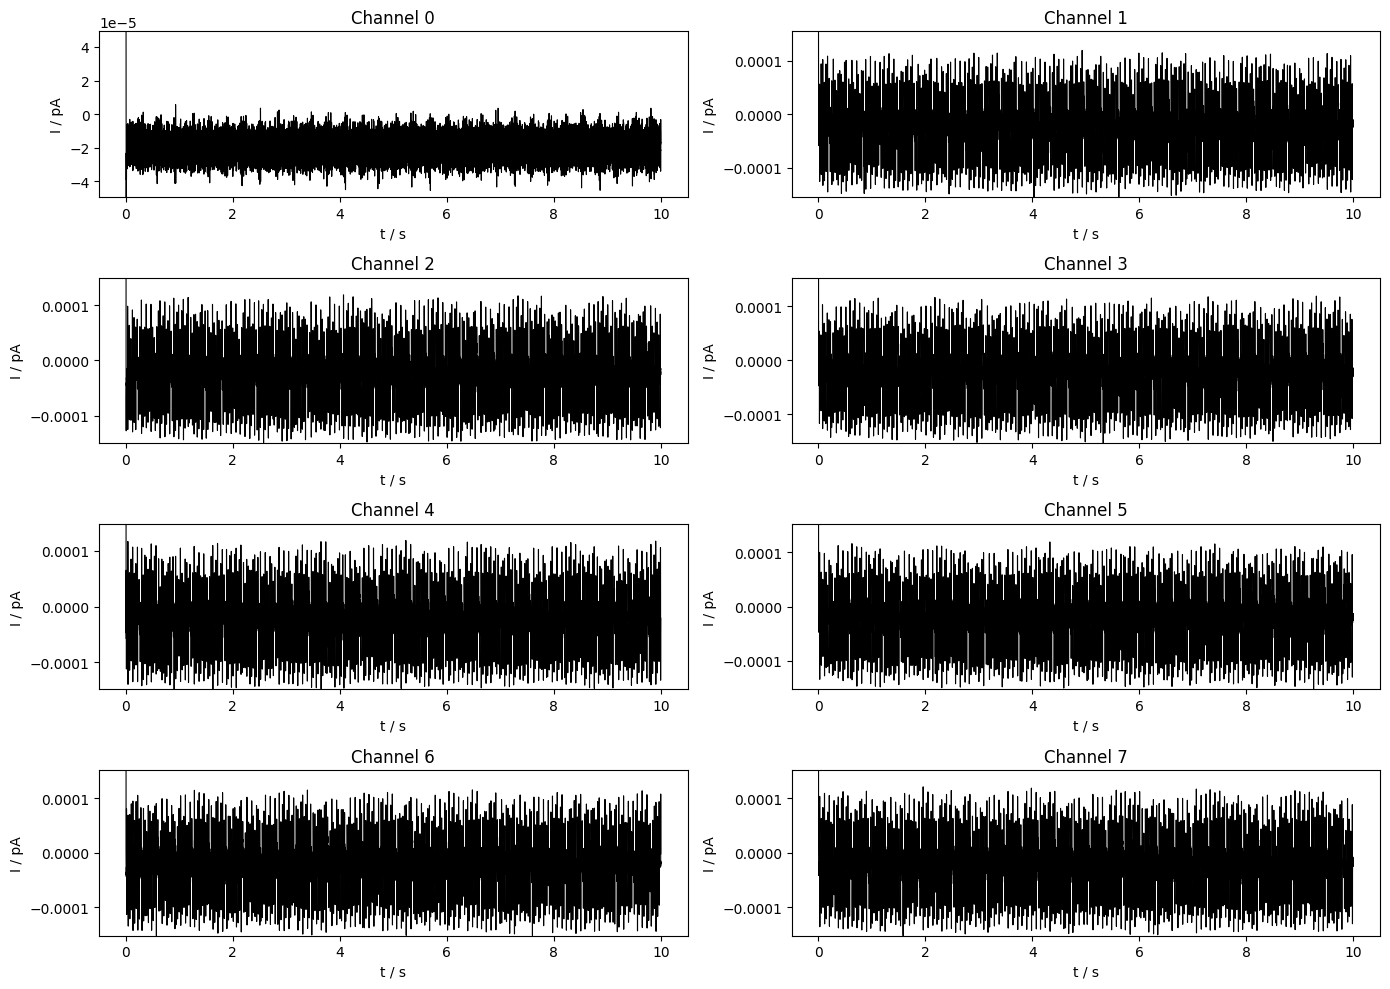

In [127]:
plot_channel_data()